# 1. Introduction

<b> Name: </b> Mohammad Javad Sharififar

<b> E-Mail: </b> Sharifi700@gmail.com

<b> Discription: </b> Thsi code is a model which trained on <i> Data.csv (price of houses in Tehran) </i> from <i> https://github.com/amiralimadadi/Regression_TheranHousing </i>. Here we want to predict the price of house in Tehran

# 2. Set the Notebook

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
data_or = pd.read_csv("https://raw.githubusercontent.com/amiralimadadi/Regression_TheranHousing/main/Data.csv")

In [3]:
data = data_or.copy() #we work on data to not lose original data in case of needings

# 3. Exploratory Data Analysis

In [4]:
data

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1
...,...,...,...,...,...,...,...,...,...
12378,7.000000e+08,مرزداران,170,1375,7.000000e+08,0.0,0,1,1
12379,1.000810e+08,امیریه,91,1380,1.000000e+08,2700000.0,0,1,1
12380,2.001800e+08,دارآباد,80,1395,2.000000e+08,6000000.0,1,1,1
12381,8.000000e+08,پاسداران,100,1399,8.000000e+08,0.0,1,1,1


Its obvious that we want to predict <i> total_value </i> feature by regression. Its also important that total value is <i> deposite + 3 rent </i>, so we cant use these t features to predict the target.

In [5]:
data.describe()

,total_value,area,year,deposit,rent,elavator,parking,warehouse
count,1.238300e+04,12383.000000,12383.000000,1.238300e+04,1.238300e+04,12383.000000,12383.000000,12383.000000
mean,4.958421e+08,171.521198,1391.682468,4.952882e+08,1.846474e+07,0.806347,0.884923,0.999838
std,8.858276e+08,2979.645853,6.686362,8.856925e+08,4.773774e+08,0.395176,0.319128,0.012708
min,0.000000e+00,5.000000,1363.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.001800e+08,80.000000,1387.000000,1.000000e+08,0.000000e+00,1.000000,1.000000,1.000000
50%,3.000000e+08,115.000000,1393.000000,3.000000e+08,1.500000e+06,1.000000,1.000000,1.000000
75%,5.509000e+08,155.000000,1397.000000,5.500000e+08,8.000000e+06,1.000000,1.000000,1.000000
max,5.000014e+10,300000.000000,1399.000000,5.000000e+10,3.500000e+10,1.000000,1.000000,1.000000


Here we got some insight about data, also we see that we have some incorrect data that should be removed or imputed, like total_value = 0, area = 5 or 3e5

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   12383 non-null  float64
 1   neighborhood  12383 non-null  object 
 2   area          12383 non-null  int64  
 3   year          12383 non-null  int64  
 4   deposit       12383 non-null  float64
 5   rent          12383 non-null  float64
 6   elavator      12383 non-null  int64  
 7   parking       12383 non-null  int64  
 8   warehouse     12383 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 870.8+ KB


also we checke feature Dtype and the null value.. till now we dont have any problem!

Now lets go to each variable and see the distribution of that.. we start with numerical variables.

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


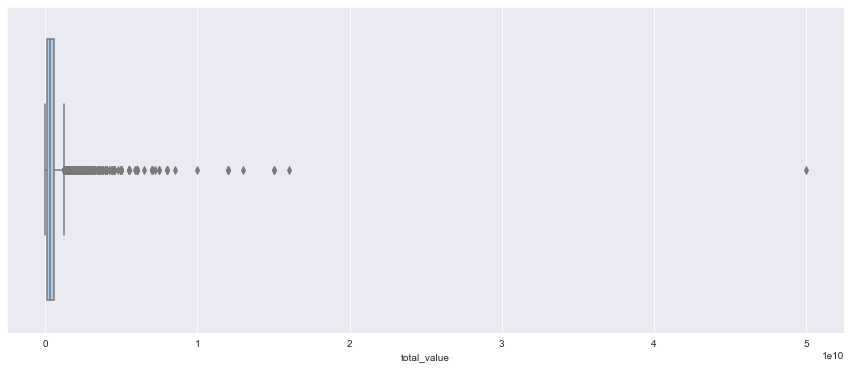

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


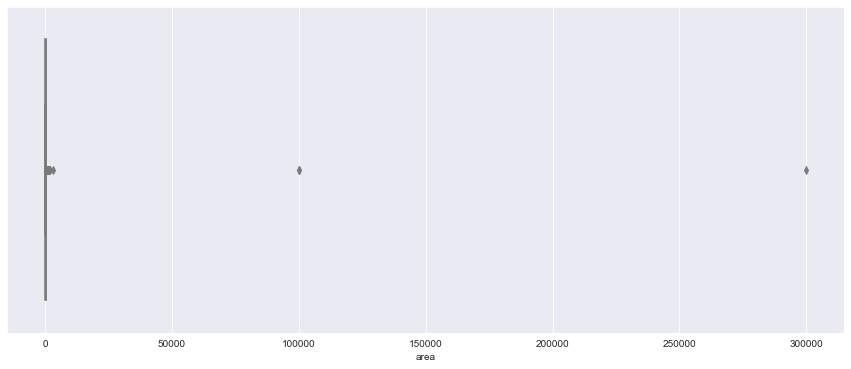

In [7]:
num_data = ['total_value','area']

sns.set_style("darkgrid")
sns.set_palette("pastel")

for i in num_data:
    plt.figure(figsize = (15,6))
    sns.boxplot(data[i])
    plt.show()

Here we see that we have absolute outliers in both variables, so we remove them all

In [8]:
#Removing Outliers
for i in num_data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQ = Q3-Q1
    data[i] = np.where(np.logical_or(data[i]>(Q3 + 1.5*IQ) ,data[i]< (Q1 - 1.5*IQ)) ,np.nan, data[i]) #change them to NaN

Lets check what happend to the data know

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


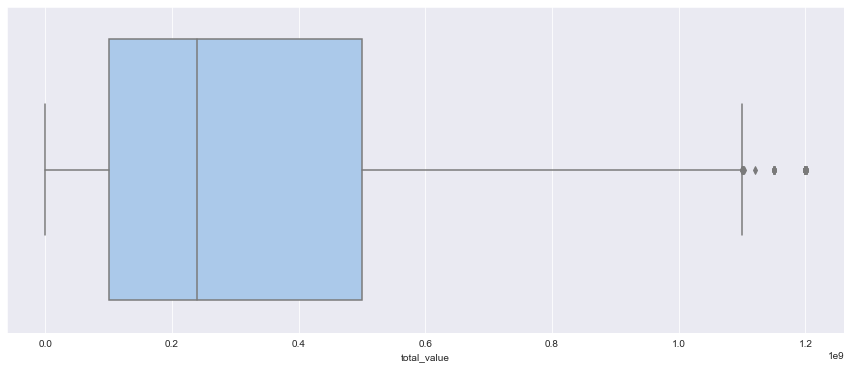

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


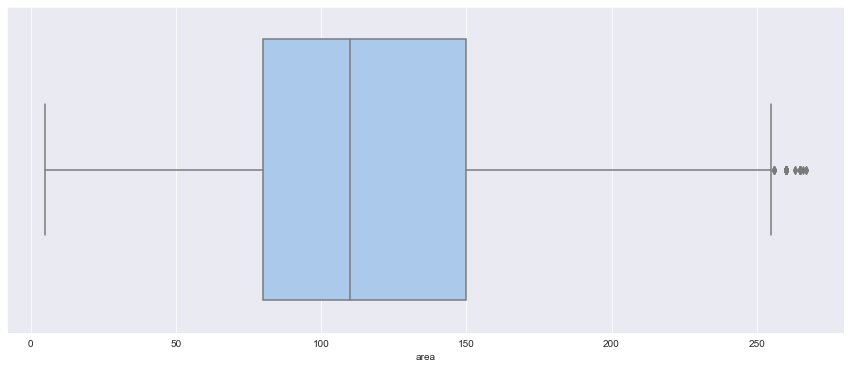

In [9]:
for i in num_data:
    plt.figure(figsize = (15,6))
    sns.boxplot(data[i])
    plt.show()

lets see how many numbers removed...

In [10]:
for i in num_data:
    print("{} value(s) removed in {}".format(data[i].isnull().sum(),i))

1060 value(s) removed in total_value
652 value(s) removed in area


it seema that we dont have any outlier now, but we have some incorrect data in both variables. so we have a look at Min of each variable

In [11]:
for i in num_data:
    print(data.groupby(i)[i].count().sort_index().head(10))

total_value
0.00        1536
30.09          1
50.24          1
140.00         1
200.15         1
320.00         1
3000.00        3
10800.00       1
12000.00       1
27000.00       1
Name: total_value, dtype: int64
area
5.0     1
7.0     1
10.0    3
12.0    1
15.0    1
16.0    1
30.0    5
32.0    1
35.0    4
36.0    3
Name: area, dtype: int64


Its obvious that total_value = 0 should removed. i just leep area<10 because we are talking about Tehram and everything is possible in this city :)

In [12]:
data['total_value'] = np.where(data['total_value']==0,np.nan,data['total_value'])

Now lets go for categorical data...

for each categorical data, we have a look on its unique values to avoid incorrection or duplication, we have a look on frequensies and number of unique values

In [13]:
cat_data = ["year",'neighborhood',"elavator","parking","warehouse"]
for i in cat_data:
    print(i.upper(),':')
    print(sorted(data[i].unique()),"\n")
    print(data.groupby(i)[i].count().sort_values(),'\n')
    print('Num of unique values:',len(data[i].unique()),'\n')

YEAR :
[1363, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399] 

year
1373      12
1374      13
1376      15
1372      19
1377      28
1378      36
1371      52
1379      53
1381      87
1363      99
1375     102
1382     140
1383     155
1384     263
1391     331
1386     388
1387     389
1389     406
1380     420
1393     436
1392     465
1394     512
1388     566
1396     784
1398     858
1397     860
1385     894
1390     932
1395     989
1399    2079
Name: year, dtype: int64 

Num of unique values: 30 

NEIGHBORHOOD :
[' آبشار ', ' آبشار تهران ', ' آجودانیه ', ' آذربایجان ', ' آذری ', ' آرژانتین ', ' آسمان ', ' آشتیانی ', ' آهنگ ', ' ائمه اطهار ', ' اباذر ', ' ابوذر (منطقه ۱۵) ', ' اتابک ', ' اختیاریه ', ' اراج ', ' ارامنه ', ' ارم ', ' ازگل ', ' استاد معین ', ' استخر ', ' اسکندری ', ' افسریه ', ' اقدسیه ', ' المهدی ', ' الهیه ', ' امام حسین(ع) ', ' امام سجا

looking at categorical variables, we notice:

* We dont have any problem with year, elevator and parking.
* In neighborhood variable, we have some values with much low frequency and beacuse we want to perform One_Hot on this variable, we should reduce unique values as much as we can. so we should aggregate all these low frequences in one value lile 'other'
* in Warehouse variable, we just have 2 warehouse = 0, which does not effect targer variable and this variable is sparse. so we can omit that to save processing capacity.

Lets go to the neignorhood and see the frequncies...

In [14]:
a = pd.DataFrame(data.groupby("neighborhood")['neighborhood'].count().sort_values())
a.rename(columns = {'neighborhood':'Frequency'},inplace = True)

In [15]:
a.groupby('Frequency')['Frequency'].count().head(10)

Frequency
1     44
2     27
3     27
4     19
5      9
6     14
7     15
8      8
9      9
10     8
Name: Frequency, dtype: int64

So upthere we can see that we have 44 neighborhood with just 1 frequency, 27 with 2 and 3 frequency, etc. I guess its suitable if we aggregate all values with frequency <=5 as the name 'سایر'

In [16]:
data['neighborhood'] = np.where(data['neighborhood'].isin(list(a[a<6].dropna().index)),"سایر",data['neighborhood'])

and then we check if it has done truely:

In [17]:
len(data['neighborhood'].unique())

189

Now we converted low frequent values to one value.., Lets go for the next step

So after examinning all variables individually, we try to examin them together and find their correlations

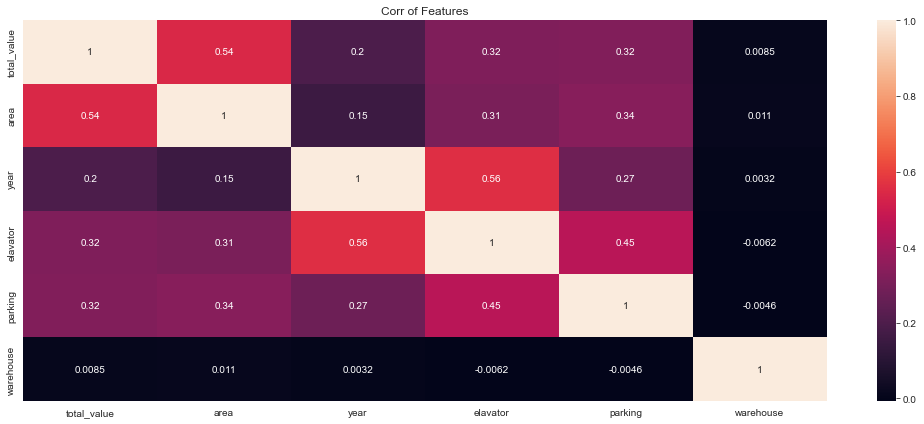

In [17]:
cor = data[['total_value','area','year','elavator','parking','warehouse']].corr()
plt.figure(figsize=(18,7))
heatmap = sns.heatmap(cor,annot = True)
heatmap.set(title = 'Corr of Features');

This heatmap tells us manythings:

* Area has the most correlation with target, so we can use it in predicting.
* warehouse, as mentioned, doesnt have any correlation with anything and can be omitted.
* Elavator, is correlated with parking and year, means in recent year we have much more houses with elavator

lets draw scatter plot of year_price and area_price to see the correlation better:

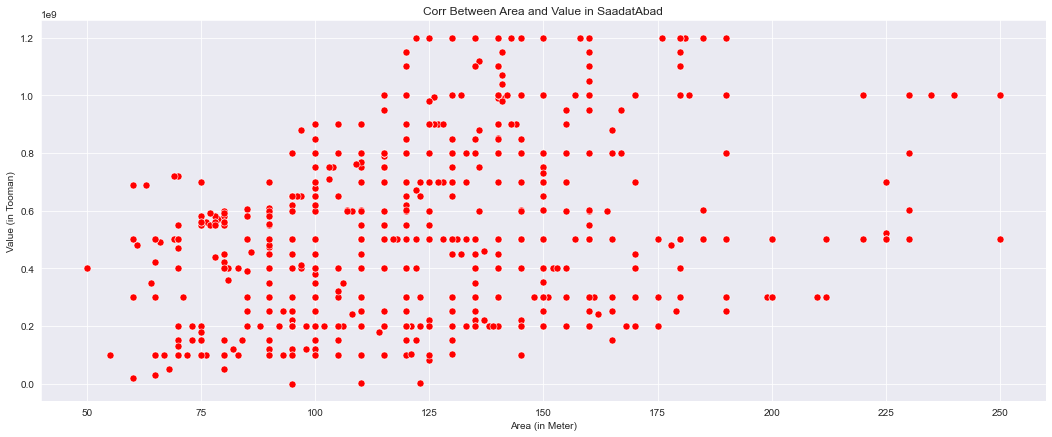

In [18]:
plt.figure(figsize= (18,7))

SA = data[data['neighborhood'].str.contains('سعادت')] # We sholud choose one neighbor and choose the most Frequent

sns.scatterplot(x = "area", y = "total_value", data = SA, s = 50, c = ['red'])
plt.xlabel('Area (in Meter)');
plt.ylabel('Value (in Tooman)');
plt.title('Corr Between Area and Value in SaadatAbad')
plt.show()

So till now we got an insight from data.. now we go for preprocessing

# 4. Preprocessing

## 4.1. Handling Incorrect Data

We did one step of this, when we omitted total_value = 0

But if we have more percise vision, we see there are more incorrect data, like this below:

In [21]:
data.sort_values(by = 'total_value').head(10)

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
46,30.09,شاهین,60.0,1380,30.0,3.0,0,0,1
8847,50.24,تهرانپارس شرقی,115.0,1397,50.0,8.0,1,1,1
3241,140.00,شهریار,90.0,1399,140.0,0.0,1,1,1
5723,200.15,سوهانک,87.0,1380,200.0,5.0,0,1,1
5290,320.00,بریانک,105.0,1395,320.0,0.0,1,1,1
955,3000.00,فاطمی,90.0,1399,0.0,100000.0,1,1,1
9900,3000.00,سعادت‌آباد,95.0,1396,0.0,100000.0,1,1,1
3705,3000.00,ازگل,145.0,1399,0.0,100000.0,1,1,1
5261,10800.00,شهران شمالی,35.0,1399,0.0,360000.0,1,1,1
5253,12000.00,مشیریه,10.0,1397,0.0,400000.0,1,1,1


As we see above, we have values in total_value column that have just few digits, so these are absolutaly wrong and should be removed

<b> Important: </b> To handle this problem, we fisrt build a column including number of digits of total_value, and then examin the number of digits grouped by the year to omit the effect of inflation and examin each year by itself. then we remove each row that total value column has significantly fewer num of digits in comparison with other total_values in the specific year

In [22]:
#Defining function to compute num of digits
def numdigits(num):
    i = 0
    k = num
    while k>0:
        k = num//10
        num = k
        i = i+1
    return i

In [23]:
#Creat a column with num of digits of total_value
data['value_digits'] = data['total_value'].apply(lambda x: numdigits(x))

In [24]:
# have a look if its done right
data

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse,value_digits
0,NaN,ولنجک,NaN,1399,2.000000e+09,30000000.0,1,1,1,0
1,200120000.0,کوی فردوس,70.0,1387,2.000000e+08,4000000.0,0,1,1,9
2,350255000.0,پونک,120.0,1395,3.500000e+08,8500000.0,1,1,1,9
3,200300000.0,هروی,110.0,1395,2.000000e+08,10000000.0,1,1,1,9
4,200180000.0,پونک,80.0,1387,2.000000e+08,6000000.0,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...
12378,700000000.0,مرزداران,170.0,1375,7.000000e+08,0.0,0,1,1,9
12379,100081000.0,امیریه,91.0,1380,1.000000e+08,2700000.0,0,1,1,9
12380,200180000.0,دارآباد,80.0,1395,2.000000e+08,6000000.0,1,1,1,9
12381,800000000.0,پاسداران,100.0,1399,8.000000e+08,0.0,1,1,1,9


We first should drop NaN values before computing mean num of digit for each year, becuase NaN has 0 digit and this effect the output

In [39]:
data_f = data.dropna(axis = 0)

Lets have a look in the mean value_digits for each year

In [40]:
data_f.groupby('year')['value_digits'].mean()

year
1363    8.845238
1371    9.000000
1372    8.941176
1373    9.000000
1374    8.636364
1375    8.882353
1376    8.846154
1377    8.909091
1378    8.911765
1379    8.795918
1380    8.826446
1381    8.794872
1382    8.777778
1383    8.848921
1384    8.857724
1385    8.871762
1386    8.903904
1387    8.954819
1388    8.887097
1389    8.831361
1390    8.937082
1391    8.928058
1392    8.906166
1393    8.913165
1394    8.946731
1395    8.903846
1396    8.945486
1397    8.974315
1398    8.998182
1399    9.025111
Name: value_digits, dtype: float64

as you can see above, most of the year has mean of value_digits bigger that 8 and just 2 of them are 9 or bigger, also mean of value_digits>9 are not much bigger than 9 and are really close to 8. so we can set the thersh = 8 and remove all rows with value_digits<8 

In [41]:
data_f['value_digits'] = np.where(data_f['value_digits']<8,np.nan,data_f['value_digits'])

C:\Users\MJavad\AppData\Local\Temp\ipykernel_8472\1148322926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['value_digits'] = np.where(data_f['value_digits']<8,np.nan,data_f['value_digits'])


## 4.2. Imputing Missing Values

We made some NaN values in the previous section and they should be removed

In [42]:
data_f.info() #num of missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9619 entries, 1 to 12382
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   9619 non-null   float64
 1   neighborhood  9619 non-null   object 
 2   area          9619 non-null   float64
 3   year          9619 non-null   int64  
 4   deposit       9619 non-null   float64
 5   rent          9619 non-null   float64
 6   elavator      9619 non-null   int64  
 7   parking       9619 non-null   int64  
 8   warehouse     9619 non-null   int64  
 9   value_digits  9579 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 826.6+ KB


In [43]:
data_f = data_f.dropna(axis = 0)

In [44]:
data_f.info() #chack if it is done right!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9579 entries, 1 to 12382
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   9579 non-null   float64
 1   neighborhood  9579 non-null   object 
 2   area          9579 non-null   float64
 3   year          9579 non-null   int64  
 4   deposit       9579 non-null   float64
 5   rent          9579 non-null   float64
 6   elavator      9579 non-null   int64  
 7   parking       9579 non-null   int64  
 8   warehouse     9579 non-null   int64  
 9   value_digits  9579 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 823.2+ KB


## 4.3. Imputing Outliers

It has done already!

## 4.4. Rempving Duplicate Values and low variation data

Here we remove duplicate and non useful columns, including rent, warehouse and deposite

In [45]:
data_f.drop_duplicates(inplace = True)
data_f.drop(['warehouse','rent','deposit','value_digits'], axis = 1, inplace = True)

## 4.5. Handling Categorical Data 

Earlier we integrated neighborhood. Here we perform One-Hot on that

In [46]:
temp = pd.get_dummies(data_f['neighborhood'])
data_f = pd.concat([data_f,temp],axis = 1)
data_f.drop('neighborhood',axis = 1,inplace = True)

In [47]:
data_f

,total_value,area,year,elavator,parking,آبشار تهران,آجودانیه,آذربایجان,آذری,آرژانتین,...,کوهک,کوی بیمه,کوی فردوس,کوی مهران,گرگان,گمرک,گیشا (کوی نصر),یافت‌آباد,یوسف‌آباد,سایر
1,200120000.0,70.0,1387,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,350255000.0,120.0,1395,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200300000.0,110.0,1395,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200180000.0,80.0,1387,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,300000000.0,60.0,1395,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12378,700000000.0,170.0,1375,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12379,100081000.0,91.0,1380,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12380,200180000.0,80.0,1395,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12381,800000000.0,100.0,1399,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.6. Feature Scaling

Feature Scaling is important for feature selection, feature extraction and training more general model; and it should be fit in training set and transform to test set. Here we chose <i> Normalization </i> for scaling. So first of all we go for train_test_split

In [48]:
X_n = data_f.drop('total_value', axis = 1, inplace  = False)
y = data_f['total_value']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_n,y,random_state = 42, test_size = 0.2)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns = list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns = list(X_test.columns))

# 4. Model Selection

First we import different types of regressions

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

Here we want to make a dataframe which examine each model based on different measures including:(
* Root Mean Squered Error,
* Mean Squered Error,
* Mean Absolute Error,
* R Squered

In [104]:
RMSE = []
MAE = []
MSE = []
R_Square = []

names = ["ExtraTrees Regressor", "Gradient Boosting Regressor", "Random Forest Regressor",  
         "Bagging Regressor","Linear Regression", "Ridge Regression", 
         "Lasso Regression", "Decision Tree Regressor", "Adaboost Regressor",'KNeighborsRegressor']
models = [ExtraTreesRegressor(random_state = 42), GradientBoostingRegressor(random_state = 42), RandomForestRegressor(random_state = 42),  
          BaggingRegressor(random_state = 42), LinearRegression(), Ridge(random_state = 42), 
          Lasso(random_state = 42), DecisionTreeRegressor(random_state = 42), AdaBoostRegressor(random_state = 42),KNeighborsRegressor()]

In [105]:
metric_dict = {'neg_mean_absolute_error':MAE,'neg_mean_squared_error':MSE,'neg_root_mean_squared_error':RMSE,'r2':R_Square}
metrics = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
for model in models:
    for i in metrics:
        scores = cross_val_score(model,X_train,y_train ,scoring = i , cv=3, n_jobs= -1)
        metric_dict[i].append(abs(np.mean(scores)))

evaluation_dataframe = pd.DataFrame({"Model": names, "MAE": MAE, "MSE": MSE, "RMSE": RMSE, "R Squared": R_Square})

In [106]:
evaluation_dataframe

,Model,MAE,MSE,RMSE,R Squared
0,ExtraTrees Regressor,1.562739e+08,5.106638e+16,2.259748e+08,3.301549e-01
1,Gradient Boosting Regressor,1.619592e+08,4.408537e+16,2.099568e+08,4.216749e-01
2,Random Forest Regressor,1.531143e+08,4.545660e+16,2.132050e+08,4.037695e-01
3,Bagging Regressor,1.558351e+08,4.763285e+16,2.182457e+08,3.751743e-01
4,Linear Regression,4.680200e+16,4.195764e+36,1.182619e+18,5.576350e+19
5,Ridge Regression,1.657826e+08,4.601722e+16,2.145077e+08,3.963223e-01
6,Lasso Regression,1.663559e+08,4.626653e+16,2.150870e+08,3.930445e-01
7,Decision Tree Regressor,1.788701e+08,6.993970e+16,2.644482e+08,8.253817e-02
8,Adaboost Regressor,1.827033e+08,5.112152e+16,2.260617e+08,3.292828e-01
9,KNeighborsRegressor,1.614798e+08,4.798467e+16,2.190462e+08,3.706187e-01


So its obvious that Gradiant Boosting Regressor has much better performance, it has the largest R Squered and samllest MSE and RMSE

# 5. Parameter Tuning

We use RandomizedSearchCV for parameter tuning to save time. <b> because we have samll amount data </b> , i didnt build validatin set for parameter tuning and i used that train set for this

In [115]:
from sklearn.model_selection import RandomizedSearchCV
rand_val_gb = {'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
               'max_depth' : np.linspace(1, 32, 32, endpoint=True),
                   'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
                   'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                   'max_features' : list(range(1,X_train.shape[1])),
                   'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200]}

rand_src = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state = 42),
                               param_distributions = rand_val_gb, cv = 3, n_jobs=-1 , scoring = 'r2',n_iter = 200)
rand_src.fit(X_train,y_train)

print('gb best values based on r2:',rand_src.best_params_ )
print('gb best score based on r2:',rand_src.best_score_ )

gb best values based on r2: {'n_estimators': 100, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_features': 190, 'max_depth': 29.0, 'learning_rate': 0.25}
gb best score based on r2: 0.38131822912201613


As we see above, a simple GBRegressor has better performace with out these parameter. so we continue without parameter tunning

# 6. Model Evaluation

In [116]:
gb = GradientBoostingRegressor().fit(X_train,y_train)
y_pred = gb.predict(X_test)

And here is final scores of model on the test set

In [118]:
from sklearn import metrics
print('GBRegression on test set:','\n',
      'MAE:{:.3f}'.format(metrics.mean_absolute_error(y_test,y_pred)),
        '\n','MSE:{:.3f}'.format(metrics.mean_squared_error(y_test,y_pred)),
        '\n','RMSE:{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),
        '\n','R_Squared:{:.3f}'.format(metrics.r2_score(y_test,y_pred)))

GBRegression on test set: 
 MAE:160931069.754 
 MSE:43931713944737880.000 
 RMSE:209598935.934 
 R_Squared:0.415


<b> Final and important Note: </b> I tried many other ways to gain better results, like using PCA for Feature Extraction, Polinaminal Regression as Model and etc. but this was the best result I made and I didnt put other ways in mu notebook. That would be my pleasure if you guid me for better result! Tnx a lot